# Import Library

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import random
from keras.preprocessing import image

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
tf.config.list_physical_devices('GPU')

[]

# Connect pada API Kaggle

In [ ]:
import os
os.getcwd()
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/Kaggle'

# Visualisasi Dataset



In [ ]:
class_names = sorted(os.listdir('/content/dataset-non-rotten/train/'))
print(class_names)

['freshapples', 'freshbanana', 'freshlemon', 'freshoranges']


In [ ]:
def list_dir(class_names, slice='train'):
  return os.listdir('/content/dataset-non-rotten/{}/{}'.format(slice, class_names))

for i in class_names:
  print(i)
  print(len(list_dir(i, 'train')))
  print(len(list_dir(i, 'test')))

freshapples
1693
395
freshbanana
1581
381
freshlemon
396
200
freshoranges
1566
388


In [ ]:
%matplotlib inline

nrows = 4
ncols = 6
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

dirs = []

for i in class_names:
  path = '/content/dataset-non-rotten/train/{}/'.format(i)
  dir = list_dir(i, 'train')
  for fileName in dir[pic_index:pic_index+6]:
    dirs.append(path+fileName)

pic_index+=6

for i, img_path in enumerate(dirs):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Pembuatan Dataset Validasi

In [ ]:
from shutil import copyfile

try:
  os.mkdir('/content/dataset-non-rotten/validation')
except:
  print('Folder already available')

def create_validation(SOURCE, DEST, SPLIT_SIZE):
    valid_data = []
    for file in os.listdir(SOURCE):
        filename = SOURCE + file
        if os.path.getsize(filename) > 0:
            valid_data.append(file)

    train_size = int(SPLIT_SIZE * len(valid_data))
    validation_size = int((1-SPLIT_SIZE) * len(valid_data))
    randomized = random.sample(valid_data, len(valid_data))
    training = randomized[:train_size]
    testing = randomized[-(validation_size+1):]

    for i in testing:
        sourceFile = SOURCE + i
        target = DEST + i
        copyfile(sourceFile, target)
        os.remove(sourceFile)

SOURCE = '/content/dataset-non-rotten/train/'
DEST = '/content/dataset-non-rotten/validation/'
SPLIT_SIZE = 0.8

for name in class_names:
  src = SOURCE + name + '/'
  trg = DEST + name + '/'
  try:
    os.mkdir(trg)
  except:
    print('Validation directory already exists')
  create_validation(src, trg, SPLIT_SIZE)

In [ ]:
for i in class_names:
  print(i)
  print(len(list_dir(i, 'train')))
  print(len(list_dir(i, 'validation')))
  print(len(list_dir(i, 'test')))

freshapples
1354
339
395
freshbanana
1264
317
381
freshlemon
316
80
200
freshoranges
1252
314
388


# Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=[0.5, 1.0],
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

test2_datagen = ImageDataGenerator(
    rescale=1./255
)

test2grabcut_datagen = ImageDataGenerator(
    rescale=1./255
)

train_dir = '/content/dataset-non-rotten/train/'
test_dir = '/content/dataset-non-rotten/test/'
validation_dir = '/content/dataset-non-rotten/validation/'
test2_dir = '/content/dataset-non-rotten/dataset-gambar-nyata/'
test2grabcut_dir = '/content/dataset-non-rotten/dataset-gambar-nyata-grabcut/'

train_flow = train_datagen.flow_from_directory(
    train_dir,
    batch_size=64,
    target_size=(224,224),
    class_mode='categorical',
)
# validation_flow = validation_datagen.flow_from_directory(
#     validation_dir,
#     batch_size=32,
#     target_size=(224,224),
#     class_mode='categorical',
# )
test_flow = test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(224,224),
    shuffle=False,
    class_mode='categorical',
)
test2_flow = test2_datagen.flow_from_directory(
    test2_dir,
    batch_size=32,
    target_size=(224,224),
    shuffle=False,
    class_mode='categorical',
)
test2grabcut_flow = test2grabcut_datagen.flow_from_directory(
    test2grabcut_dir,
    batch_size=32,
    target_size=(224,224),
    shuffle=False,
    class_mode='categorical',
)

Found 5236 images belonging to 4 classes.
Found 1364 images belonging to 4 classes.
Found 848 images belonging to 4 classes.
Found 840 images belonging to 4 classes.


In [ ]:
# jumlah steps = jumlah gambar // batch_size
train_steps = 4186  // 64
val_steps = 1050  // 32
test_steps = 1364  // 32
test2_steps = 848 // 32
test2grabcut_steps = 840 // 32

In [ ]:
train_flow.class_indices

{'freshapples': 0, 'freshbanana': 1, 'freshlemon': 2, 'freshoranges': 3}

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
test3_datagen = ImageDataGenerator(
    rescale=1./255
)

test3_dir = '/content/dataset-non-rotten/dataset-gambar-nyata-grabcut-only/'
test4_dir = '/content/dataset-non-rotten/dataset-gambar-nyata-gauscon/'

test3_flow = test3_datagen.flow_from_directory(
    test3_dir,
    batch_size=32,
    target_size=(224,224),
    shuffle=False,
    class_mode='categorical',
)

test4_flow = test3_datagen.flow_from_directory(
    test4_dir,
    batch_size=32,
    target_size=(224,224),
    shuffle=False,
    class_mode='categorical',
)

Found 872 images belonging to 4 classes.
Found 872 images belonging to 4 classes.


In [ ]:
# jumlah steps = jumlah gambar // batch_size
test3_steps = 872 // 32
test4_steps = 872 // 32

# Pembangunan Model

In [ ]:
PRETRAINED_MODEL = 'https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5'
IMAGE_SIZE = (224, 224, 3)
OUTPUT_SHAPE = [1280]

model = tf.keras.Sequential(
    [
     hub.KerasLayer(PRETRAINED_MODEL,
                    input_shape=IMAGE_SIZE,
                    output_shape=OUTPUT_SHAPE,
                    trainable=False,
                    ),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(units=512, activation='relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(units=64, activation='relu'),
     tf.keras.layers.Dense(units=4, activation='softmax'),
    ]
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4226432   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 4,915,396
Trainable params: 688,964
Non-tr

# Fungsi Callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.990):
      print('Target accuracy acquired!')
      self.model.stop_training = True

# Fitting Model

In [ ]:
callbacks = myCallback()
history = model.fit(train_flow,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_flow,
                    steps_per_epoch=train_steps,
                    validation_steps=val_steps
                    )

Epoch 1/15
65/65 [==============================] - 184s 3s/step - loss: 0.0610 - accuracy: 0.9750 - val_loss: 0.0485 - val_accuracy: 0.9824
Epoch 2/15
65/65 [==============================] - 173s 3s/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.0158 - val_accuracy: 0.9912
Epoch 3/15
65/65 [==============================] - 171s 3s/step - loss: 0.0090 - accuracy: 0.9966 - val_loss: 0.0028 - val_accuracy: 0.9990
Epoch 4/15
65/65 [==============================] - 172s 3s/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0104 - val_accuracy: 0.9961
Epoch 5/15
65/65 [==============================] - 170s 3s/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 3.7045e-04 - val_accuracy: 1.0000
Epoch 6/15
65/65 [==============================] - 172s 3s/step - loss: 0.0109 - accuracy: 0.9978 - val_loss: 8.3551e-04 - val_accuracy: 1.0000
Epoch 7/15
65/65 [==============================] - 172s 3s/step - loss: 0.0358 - accuracy: 0.9956 - val_loss: 0.0061 - val_accuracy: 0.9971
Epoch

# Load Weight

In [ ]:
%cd ../

/content


In [ ]:
model.load_weights('fruit_classifier_weight.h5')

# Evaluasi Model

Text(0.5, 1.0, 'Accuracy')

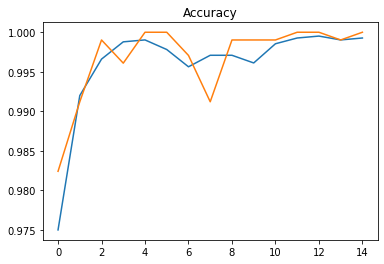

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

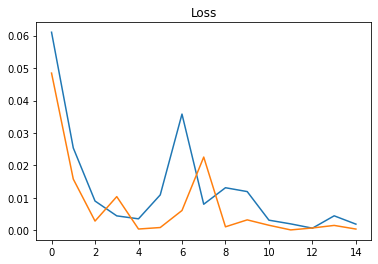

In [ ]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss')

In [ ]:
import pandas as pd

hist_df = pd.DataFrame(history.history)

hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
model.evaluate(test_flow, verbose=1)

43/43 [==============================] - 37s 846ms/step - loss: 0.0048 - accuracy: 0.9971


[0.0047580162063241005, 0.9970674514770508]

In [ ]:
# test dengan dataset gambar kamera android
model.evaluate(test2_flow, verbose=1)

27/27 [==============================] - 22s 816ms/step - loss: 0.4379 - accuracy: 0.8892


[0.43793660402297974, 0.8891509175300598]

In [ ]:
# test dengan dataset gambar kamera android setelah gaussian blur, peningkatan kontras dan GrabCut
model.evaluate(test2grabcut_flow, verbose=1)

27/27 [==============================] - 21s 779ms/step - loss: 0.2718 - accuracy: 0.9238


[0.2718011438846588, 0.9238095283508301]

In [ ]:
# test dengan dataset gambar kamera android setelah GrabCut
model.evaluate(test3_flow, verbose=1)

28/28 [==============================] - 22s 773ms/step - loss: 0.2162 - accuracy: 0.9278


[0.21619461476802826, 0.9277523159980774]

In [ ]:
# test dengan dataset gambar kamera android setelah gaussian blur dan peningkatan kontras
model.evaluate(test4_flow, verbose=1)

28/28 [==============================] - 23s 804ms/step - loss: 1.3043 - accuracy: 0.7339


[1.3042514324188232, 0.7339449524879456]

# GrabCut

In [ ]:
# import cv2

# def grabcut(input):
#   # input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)
#   img_input = cv2.GaussianBlur(input, (5, 5), 0)

#   alpha = 1.5
#   beta = -50
#   img_contrasted = cv2.convertScaleAbs(img_input, alpha=alpha, beta=beta)

#   mask = np.zeros(img_contrasted.shape[:2],np.uint8)
#   bgdModel = np.zeros((1,65), np.float64)
#   fgdModel = np.zeros((1,65), np.float64)
#   rect = (22, 22, 202, 202)
#   cv2.grabCut(img_contrasted, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
#   mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
#   img_cut = img_contrasted * mask2[:, :, np.newaxis]

#   img_res = np.copy(img_cut)
#   black_pixels = np.where(
#     (img_res[:, :, 0] == 0) &
#     (img_res[:, :, 1] == 0) &
#     (img_res[:, :, 2] == 0)
#   )

#   img_res[black_pixels] = [255, 255, 255]

#   # x_grabcut = np.expand_dims(img_res, axis=0)
#   # x_grabcut = x_grabcut/255.0
#   # cut_image = np.vstack([x_grabcut])
#   return img_res

# Evaluasi Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
test_steps_per_epoch = np.math.ceil(test_flow.samples / test_flow.batch_size)
predictions = model.predict_generator(test_flow, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_flow.classes
class_labels = list(test_flow.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)
res = tf.math.confusion_matrix(true_classes, predicted_classes, num_classes=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


              precision    recall  f1-score   support

 freshapples       1.00      1.00      1.00       395
 freshbanana       1.00      1.00      1.00       381
  freshlemon       0.99      0.99      0.99       200
freshoranges       1.00      0.99      1.00       388

    accuracy                           1.00      1364
   macro avg       1.00      1.00      1.00      1364
weighted avg       1.00      1.00      1.00      1364



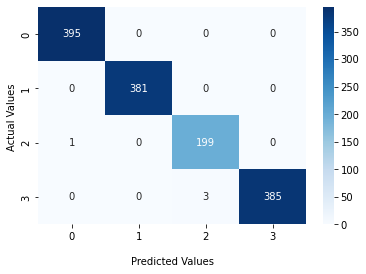

In [ ]:
ax = sns.heatmap(res.numpy(), annot=True, cmap='Blues', fmt='d')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


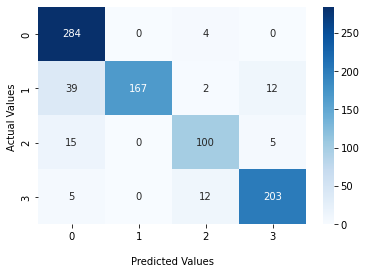

In [ ]:
test2_steps_per_epoch = np.math.ceil(test2_flow.samples / test2_flow.batch_size)
predictions = model.predict_generator(test2_flow, steps=test2_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test2_flow.classes
class_labels = list(test2_flow.class_indices.keys())
# print(predicted_classes)
# print(true_classes)
res = tf.math.confusion_matrix(true_classes, predicted_classes, num_classes=4)
# report = classification_report(true_classes, predicted_classes, target_names=class_labels)
# print(report)
ax = sns.heatmap(res.numpy(), annot=True, cmap='Blues', fmt='d')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [ ]:
all_preds = [[284, 0, 4, 0],[39, 167, 2, 12],[15, 0, 100, 5],[5, 0, 12, 203]]

prec = []
rec = []
f1 = []

for i in range(len(all_preds)):
  tp = all_preds[i][i]
  prec_div = sum([j[i] for j in all_preds])
  rec_div = sum(all_preds[i])

  prec_curr = tp/prec_div
  rec_curr = tp/rec_div

  prec.append(prec_curr)
  rec.append(rec_curr)
  f1.append(((2*prec_curr*rec_curr)/(prec_curr+rec_curr)))

In [ ]:
sum([j[0] for j in all_preds])

343

In [ ]:
print(prec,"\n",rec,"\n",f1)

[0.8279883381924198, 1.0, 0.847457627118644, 0.9227272727272727] 
 [0.9861111111111112, 0.759090909090909, 0.8333333333333334, 0.9227272727272727] 
 [0.9001584786053883, 0.8630490956072351, 0.8403361344537815, 0.9227272727272727]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


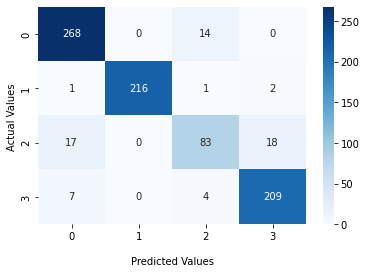

In [ ]:
test2grabcut_steps_per_epoch = np.math.ceil(test2grabcut_flow.samples / test2grabcut_flow.batch_size)
predictions = model.predict_generator(test2grabcut_flow, steps=test2grabcut_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test2grabcut_flow.classes
class_labels = list(test2grabcut_flow.class_indices.keys())
# print(predicted_classes)
# print(true_classes)
res = tf.math.confusion_matrix(true_classes, predicted_classes, num_classes=4)
ax = sns.heatmap(res.numpy(), annot=True, cmap='Blues', fmt='d')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [ ]:
all_preds = [[268, 0, 14, 0],[1, 216, 1, 2],[17, 0, 83, 18],[7, 0, 4, 209]]

prec = []
rec = []
f1 = []

for i in range(len(all_preds)):
  tp = all_preds[i][i]
  prec_div = sum([j[i] for j in all_preds])
  rec_div = sum(all_preds[i])

  prec_curr = tp/prec_div
  rec_curr = tp/rec_div

  prec.append(prec_curr)
  rec.append(rec_curr)
  f1.append(((2*prec_curr*rec_curr)/(prec_curr+rec_curr)))

In [ ]:
print(prec,"\n",rec,"\n",f1)

[0.9146757679180887, 1.0, 0.8137254901960784, 0.9126637554585153] 
 [0.950354609929078, 0.9818181818181818, 0.7033898305084746, 0.95] 
 [0.9321739130434782, 0.9908256880733944, 0.7545454545454545, 0.9309576837416481]


In [ ]:
res.numpy().shape

(4, 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


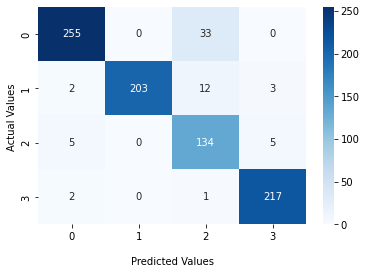

In [ ]:
test3_steps_per_epoch = np.math.ceil(test3_flow.samples / test3_flow.batch_size)
predictions = model.predict_generator(test3_flow, steps=test3_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test3_flow.classes
class_labels = list(test2grabcut_flow.class_indices.keys())
# print(predicted_classes)
# print(true_classes)
res = tf.math.confusion_matrix(true_classes, predicted_classes, num_classes=4)
ax = sns.heatmap(res.numpy(), annot=True, cmap='Blues', fmt='d')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [ ]:
all_preds = [[255, 0, 33, 0],[2, 203, 12, 3],[5, 0, 134, 5],[2, 0, 1, 217]]

prec = []
rec = []
f1 = []

for i in range(len(all_preds)):
  tp = all_preds[i][i]
  prec_div = sum([j[i] for j in all_preds])
  rec_div = sum(all_preds[i])

  prec_curr = tp/prec_div
  rec_curr = tp/rec_div

  prec.append(prec_curr)
  rec.append(rec_curr)
  f1.append(((2*prec_curr*rec_curr)/(prec_curr+rec_curr)))

print(prec,"\n",rec,"\n",f1)

[0.9659090909090909, 1.0, 0.7444444444444445, 0.9644444444444444] 
 [0.8854166666666666, 0.9227272727272727, 0.9305555555555556, 0.9863636363636363] 
 [0.9239130434782609, 0.9598108747044917, 0.8271604938271605, 0.9752808988764046]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


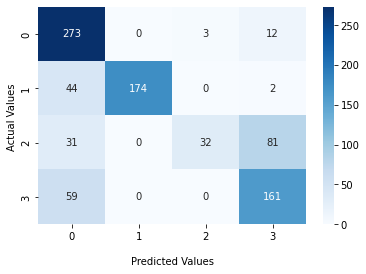

In [ ]:
test4_steps_per_epoch = np.math.ceil(test4_flow.samples / test4_flow.batch_size)
predictions = model.predict_generator(test4_flow, steps=test4_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test4_flow.classes
class_labels = list(test4_flow.class_indices.keys())
# print(predicted_classes)
# print(true_classes)
res = tf.math.confusion_matrix(true_classes, predicted_classes, num_classes=4)
ax = sns.heatmap(res.numpy(), annot=True, cmap='Blues', fmt='d')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [ ]:
all_preds = [[273, 0, 3, 12],[44, 174, 0, 2],[31, 0, 32, 81],[59, 0, 0, 161]]

prec = []
rec = []
f1 = []

for i in range(len(all_preds)):
  tp = all_preds[i][i]
  prec_div = sum([j[i] for j in all_preds])
  rec_div = sum(all_preds[i])

  prec_curr = tp/prec_div
  rec_curr = tp/rec_div

  prec.append(prec_curr)
  rec.append(rec_curr)
  f1.append(((2*prec_curr*rec_curr)/(prec_curr+rec_curr)))

print(prec,"\n",rec,"\n",f1)

[0.6707616707616708, 1.0, 0.9142857142857143, 0.62890625] 
 [0.9479166666666666, 0.7909090909090909, 0.2222222222222222, 0.7318181818181818] 
 [0.785611510791367, 0.883248730964467, 0.35754189944134074, 0.676470588235294]


# Simpan Weight

In [ ]:
model.save_weights('fruit_classifier_weight.h5')